# Exploratory Data Analysis - Sports

(Level - Advanced)

● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
● As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.
● Suggest teams or players a company should endorse for its products.
● You can choose any of the tool of your choice
(Python/R/Tableau/PowerBI/Excel/SAP/SAS)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## function to add data to plot
def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

In [ ]:
#Reading Data
match_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GRIP/matches.csv')
deliveries_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GRIP/deliveries.csv')

In [ ]:
season_data=match_data[['id','season','winner']]

complete_data=deliveries_data.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [ ]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match_data['win_by']=np.where(match_data['win_by_runs']>0,'Bat first','Bowl first')

In [ ]:
match_data.shape

(756, 19)

In [ ]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
deliveries_data['runs']=deliveries_data['total_runs'].cumsum()

In [ ]:
deliveries_data.shape

(179078, 22)

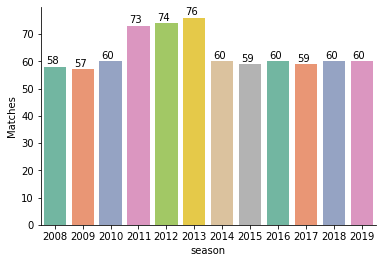

In [ ]:
#Number of Matches played in each IPL season
ax=sns.countplot('season',data=match_data,palette="Set2")
plt.ylabel('Matches')
annot_plot(ax,0.08,1)

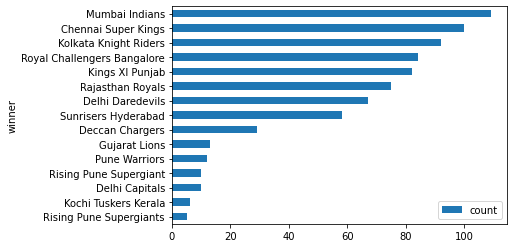

In [ ]:
#Matches Won By the Teams
#Mumbai Indians won maximum number of matches followed by Chennai Super Kings
match_data.groupby('winner')['winner'].agg(['count']).sort_values('count').reset_index().plot(x='winner',y='count',kind='barh')

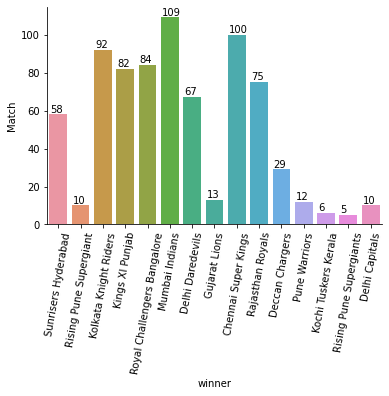

In [ ]:
ax=sns.countplot(x='winner',data=match_data)
plt.ylabel('Match')
plt.xticks(rotation=80)
annot_plot(ax,0.05,1)

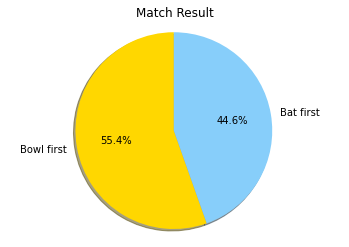

In [ ]:
#Win Percentage
match=match_data.win_by.value_counts()
labels=np.array(match.index)
sizes = match.values
colors = ['gold', 'lightskyblue']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Match Result')
plt.axis('equal')
plt.show()

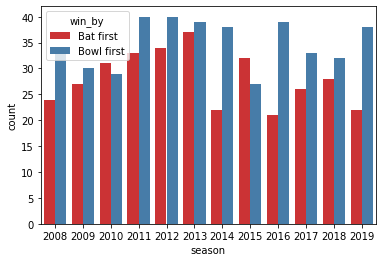

In [ ]:
sns.countplot('season',hue='win_by',data=match_data,palette="Set1")

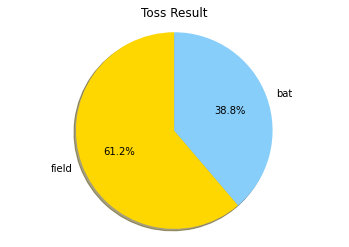

In [ ]:
#Toss Decisions so far
toss=match_data.toss_decision.value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['gold', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Result')
plt.axis('equal')
plt.show()

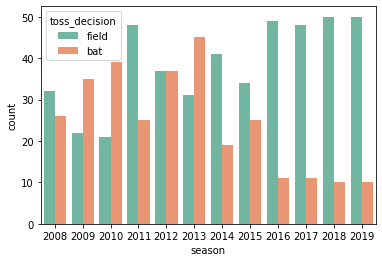

In [ ]:
sns.countplot('season',hue='toss_decision',data=match_data,palette="Set2")

In [ ]:
#IPL Winners
final_matches=match_data.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


,season,batsman,batsman_runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


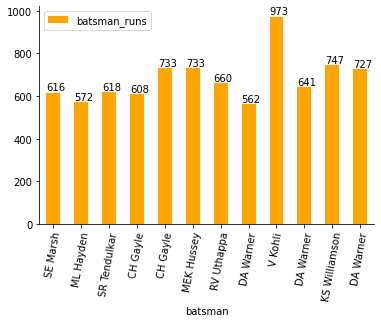

In [ ]:
#Orange Cap Winners
Season_orange_cap = complete_data.groupby(["season","batsman"])["batsman_runs"].sum().reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
Season_orange_cap= Season_orange_cap.drop_duplicates(subset=["season"],keep="first").sort_values(by="season").reset_index(drop=True)
ax=Season_orange_cap.plot('batsman','batsman_runs',color='orange',kind='bar')
plt.xticks(rotation=80)
annot_plot(ax,0,10)
Season_orange_cap

,Season,Bowler,Wicket_taken
0,2008,Sohail Tanvir,24
1,2009,RP Singh,26
2,2010,PP Ojha,22
3,2011,SL Malinga,30
4,2012,M Morkel,30
5,2013,DJ Bravo,34
6,2014,MM Sharma,26
7,2015,DJ Bravo,28
8,2016,B Kumar,24
9,2017,B Kumar,28


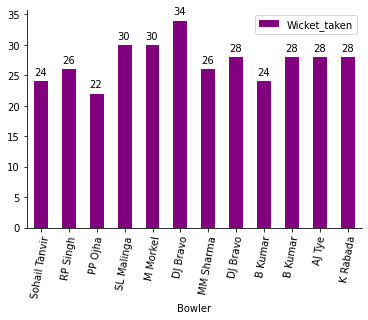

In [ ]:
#Purple Cap Winners
Season_purple_cap=complete_data[complete_data["dismissal_kind"]!="run out"]
Season_purple_cap=complete_data.groupby(["season","bowler"])["dismissal_kind"].count().reset_index().sort_values(by="dismissal_kind",ascending=False).reset_index(drop=True)
Season_purple_cap= Season_purple_cap.drop_duplicates(subset=["season"],keep="first").sort_values(by="season").reset_index(drop=True)
Season_purple_cap.columns= ["Season","Bowler","Wicket_taken"]
ax=Season_purple_cap.plot('Bowler','Wicket_taken',color='purple',kind='bar')
plt.xticks(rotation=80)
annot_plot(ax,0,1)
Season_purple_cap

In [ ]:
#Final match
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [ ]:
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Sunrisers Hyderabad      1
Deccan Chargers          1
Name: winner, dtype: int64

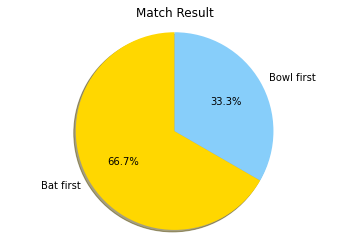

In [ ]:
#Win Percentage in Finals
match=final_matches.win_by.value_counts()
labels=np.array(match.index)
sizes = match.values
colors = ['gold', 'lightskyblue']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Match Result')
plt.axis('equal')
plt.show()

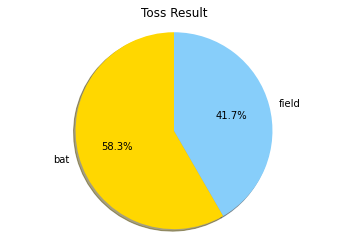

In [ ]:
#Toss Decision in Finals
toss=final_matches.toss_decision.value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['gold', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Result')
plt.axis('equal')
plt.show()

In [ ]:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [ ]:
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [ ]:
#It is interesting that out of 10 IPL finals,7 times the team that won the toss was also the winner of IPL
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])

9

In [ ]:
No_Matches_player_dismissed = deliveries_data[["match_id","player_dismissed"]]
No_Matches_player_dismissed =No_Matches_player_dismissed .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player_dismissed.columns=["batsman","No_of Matches"]
No_Matches_player_dismissed .head(5)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


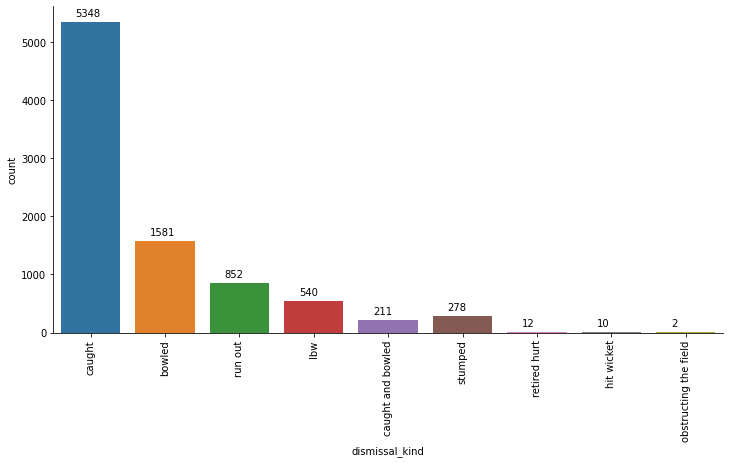

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.countplot(deliveries_data.dismissal_kind)
plt.xticks(rotation=90)
annot_plot(ax,0.2,100)

In [ ]:
#Dismissal by Teams and their distribution
out=deliveries_data.groupby(['batting_team','dismissal_kind'])['dismissal_kind'].agg(['count'])

out.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index().sort_values(['batting_team','count'],ascending=[1,0]).set_index(['batting_team','dismissal_kind'])

count
batting_team        dismissal_kind          
Chennai Super Kings caught             62.32
                    bowled             15.38
                    run out             9.86
                    lbw                 5.87
                    stumped             3.64
...                                      ...
Sunrisers Hyderabad lbw                 4.66
                    stumped             2.83
                    caught and bowled   2.00
                    hit wicket          0.50
                    retired hurt        0.17

[102 rows x 1 columns]

In [ ]:
wicket_data=deliveries_data.dropna(subset=['dismissal_kind'])

In [ ]:
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [ ]:
#IPL Most Wicket-Taking Bowlers
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


In [ ]:
powerplay_data=complete_data[complete_data['over']<=6]

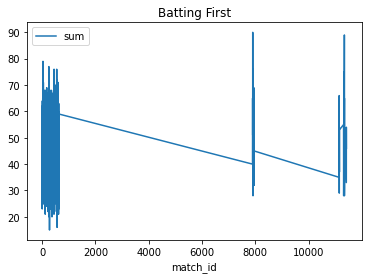

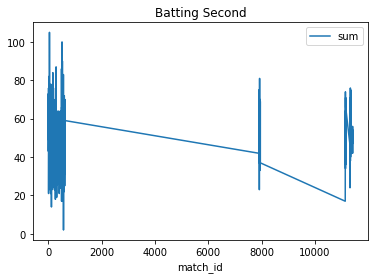

In [ ]:
powerplay_data[ powerplay_data['inning']==1].groupby('match_id')['total_runs'].agg(['sum']).reset_index().plot(x='match_id',y='sum',title='Batting First')
powerplay_data[ powerplay_data['inning']==2].groupby('match_id')['total_runs'].agg(['sum']).reset_index().plot(x='match_id',y='sum',title='Batting Second')

In [ ]:
#Higgest Runs in PowerPlays¶
powerplay_data.groupby(['season','match_id','inning'])['total_runs'].agg(['sum']).reset_index().groupby('season')['sum'].max()

season
2008     78
2009     84
2010     76
2011     87
2012     68
2013     76
2014    100
2015     90
2016     72
2017    105
2018     90
2019     89
Name: sum, dtype: int64

In [ ]:
pi1=powerplay_data[ powerplay_data['inning']==1].groupby(['season','match_id'])['total_runs'].agg(['sum'])
pi1.reset_index().groupby('season')['sum'].max()


season
2008    68
2009    68
2010    69
2011    77
2012    68
2013    76
2014    70
2015    76
2016    71
2017    79
2018    90
2019    89
Name: sum, dtype: int64

In [ ]:
pi2=powerplay_data[ powerplay_data['inning']==2].groupby(['season','match_id'])['total_runs'].agg(['sum'])

pi2.reset_index().groupby('season')['sum'].max()

season
2008     78
2009     84
2010     76
2011     87
2012     64
2013     64
2014    100
2015     90
2016     72
2017    105
2018     81
2019     76
Name: sum, dtype: int64

In [ ]:
#Maximum Wickets Fall in PowerPlay
powerplay_data.dropna(subset=['dismissal_kind']).groupby(['season','match_id','inning'])['dismissal_kind'].agg(['count']).reset_index().groupby('season')['count'].max()

season
2008    4
2009    4
2010    4
2011    6
2012    4
2013    5
2014    5
2015    5
2016    5
2017    5
2018    4
2019    7
Name: count, dtype: int64

In [ ]:
#First Innings
powerplay_data[ powerplay_data['inning']==1].dropna(subset=['dismissal_kind']).groupby(['season','match_id','inning'])['dismissal_kind'].agg(['count']).reset_index().groupby('season')['count'].max()

season
2008    4
2009    4
2010    4
2011    5
2012    4
2013    5
2014    5
2015    4
2016    4
2017    5
2018    4
2019    7
Name: count, dtype: int64

In [ ]:
#Second Innings
powerplay_data[ powerplay_data['inning']==2].dropna(subset=['dismissal_kind']).groupby(['season','match_id','inning'])['dismissal_kind'].agg(['count']).reset_index().groupby('season')['count'].max()

season
2008    4
2009    4
2010    4
2011    6
2012    4
2013    4
2014    4
2015    5
2016    5
2017    5
2018    4
2019    4
Name: count, dtype: int64